## **Morphological Operators**
- *Sets of kernels that can achieve a variety of effects, such as reducing noise.*
- *Certain operatos are very good at reducing black points on a white background (& vice versa)*
- *This effect is most easily seen on text data, so we will practise various morphological operators on some simple white text on a black background*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='PARTH', org=(50, 300), fontFace = font, fontScale = 5, color=(255,255,255), thickness=20)
    return blank_img

In [12]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

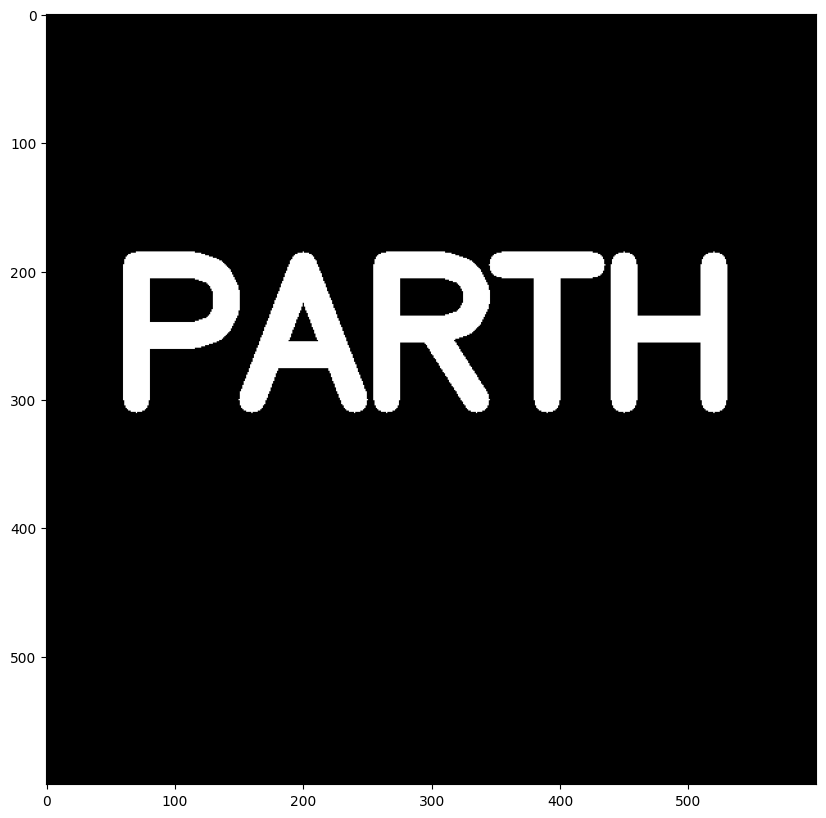

In [19]:
img = load_img()
display_img(img)

In [20]:
kernel = np.ones((5, 5), dtype=np.uint8)

In [21]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## **Erotion**

In [24]:
result = cv2.erode(img, kernel, iterations=3)

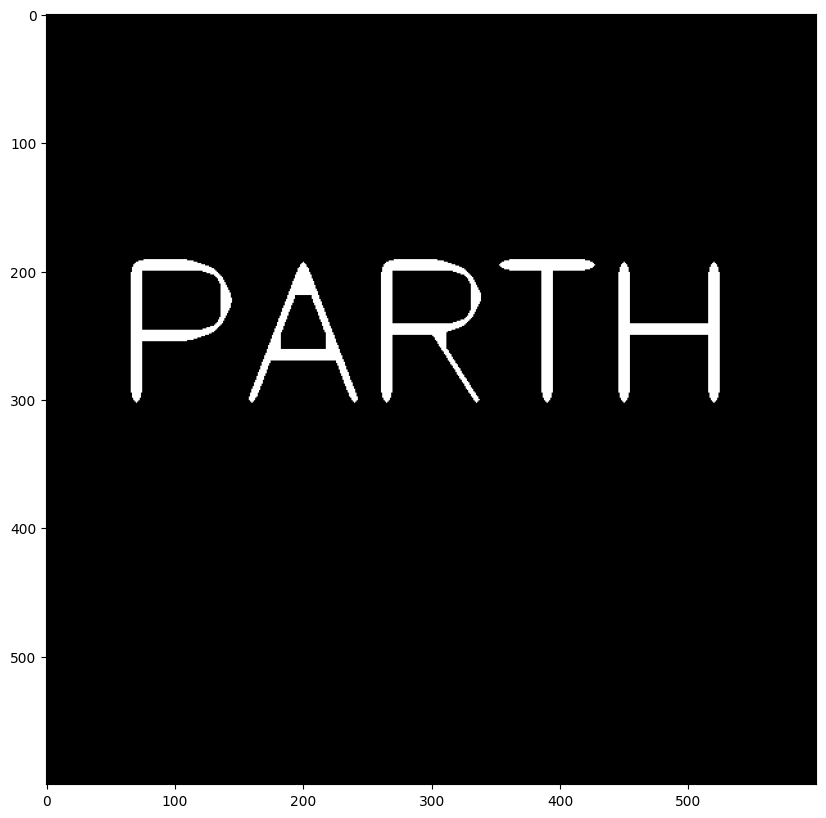

In [25]:
display_img(result)

In [26]:
img = load_img()

In [27]:
white_noise = np.random.randint(low = 0, high = 2, size = (600, 600))

In [28]:
white_noise

array([[1, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 0]], shape=(600, 600), dtype=int32)

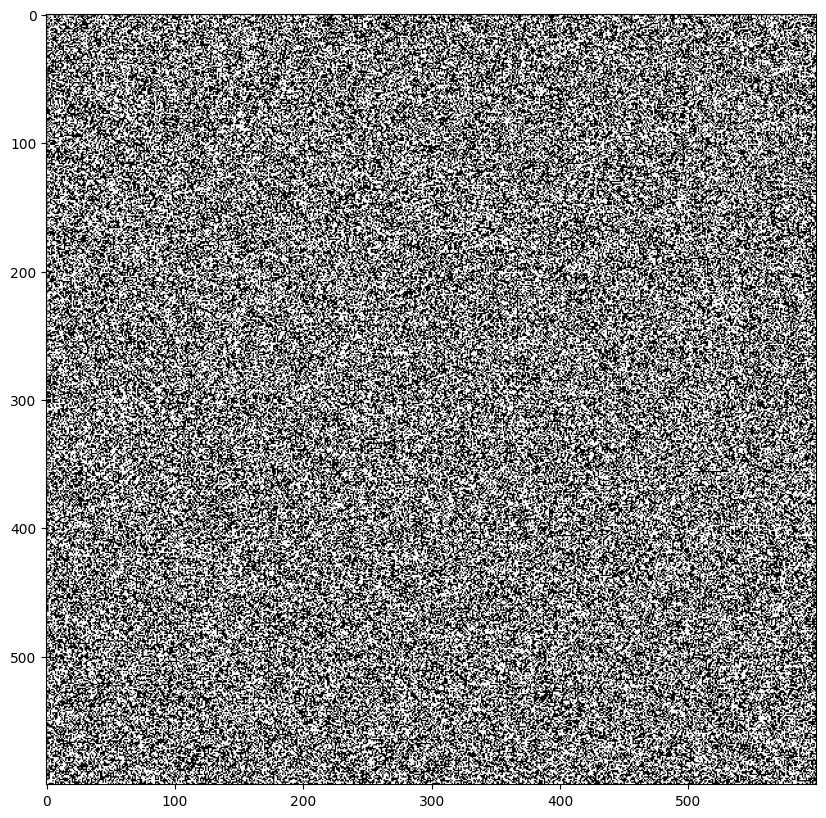

In [29]:
display_img(white_noise)

In [30]:
white_noise = white_noise * 255 

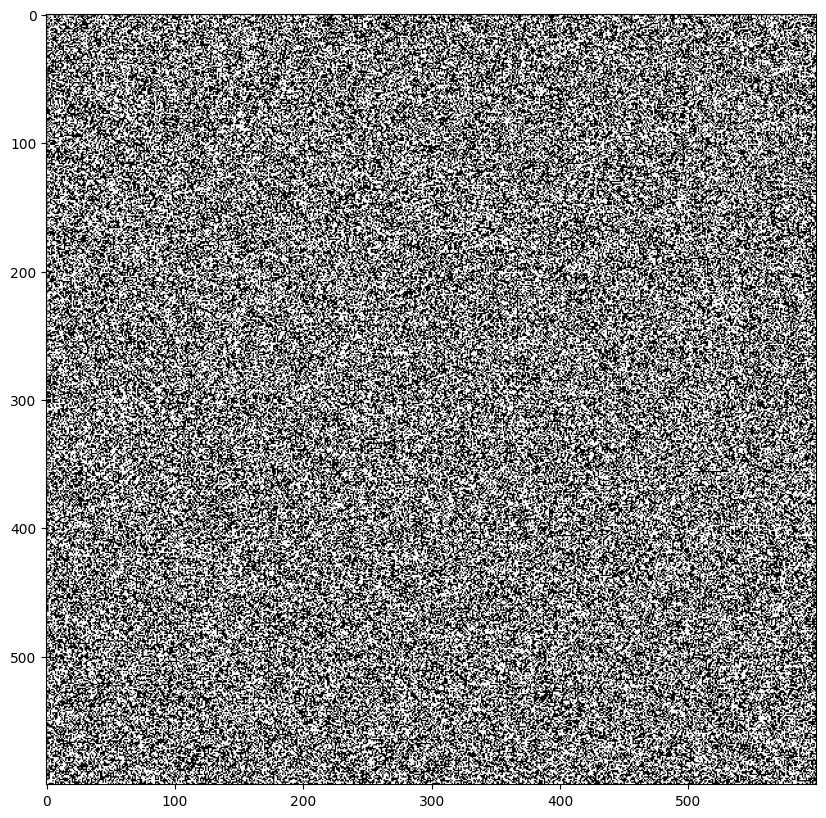

In [32]:
display_img(white_noise)

In [33]:
noise_img = white_noise + img

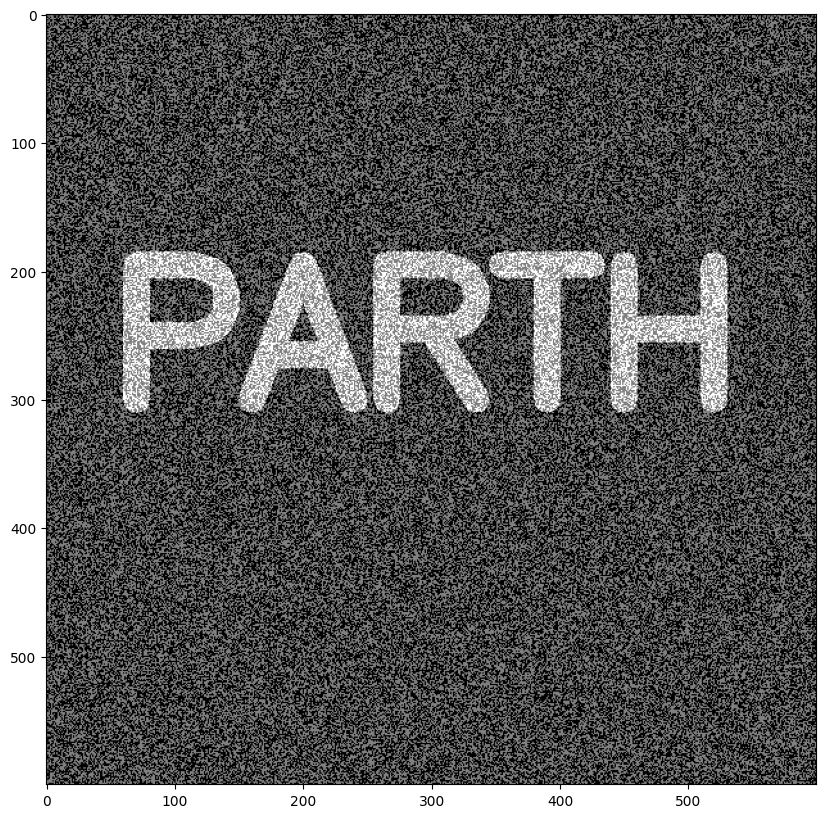

In [34]:
display_img(noise_img)

## **Opening**

In [37]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel) # Eliminating nosie

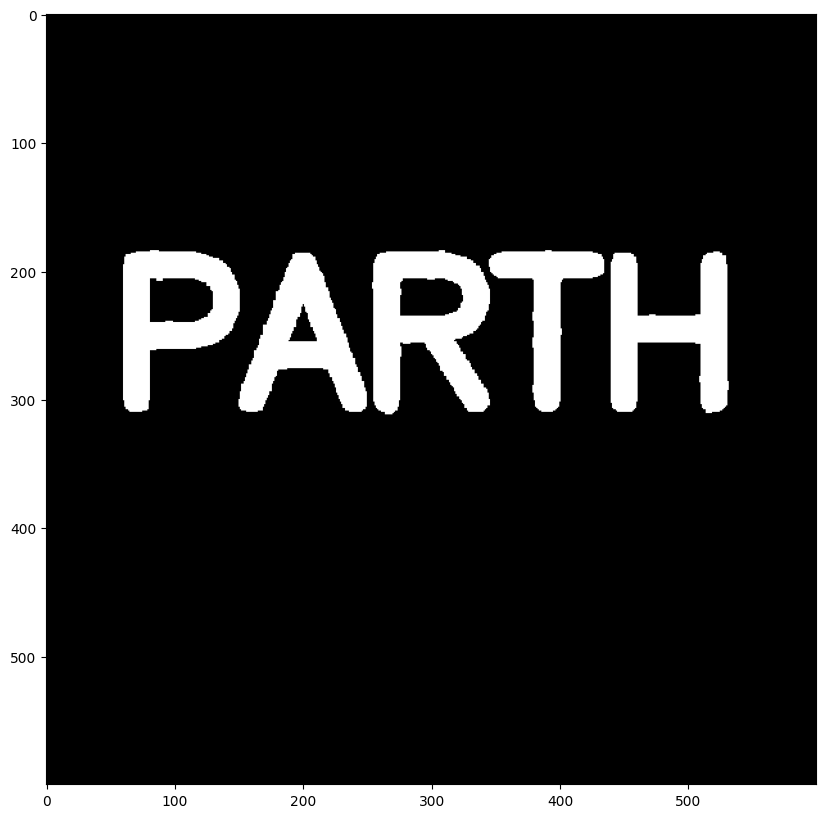

In [38]:
display_img(opening)

In [71]:
img = load_img()
print("Reset")

Reset


In [72]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [73]:
black_noise

array([[0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1]], shape=(600, 600), dtype=int32)

In [74]:
black_noise *= -255
black_noise

array([[   0,    0, -255, ..., -255, -255,    0],
       [   0,    0,    0, ...,    0, -255, -255],
       [   0, -255,    0, ..., -255,    0,    0],
       ...,
       [   0, -255, -255, ..., -255,    0,    0],
       [   0, -255,    0, ..., -255, -255, -255],
       [   0,    0, -255, ...,    0, -255, -255]],
      shape=(600, 600), dtype=int32)

In [75]:
black_noise_img = img + black_noise

In [76]:
black_noise_img

array([[   0.,    0., -255., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       ...,
       [   0., -255., -255., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ..., -255., -255., -255.],
       [   0.,    0., -255., ...,    0., -255., -255.]], shape=(600, 600))

In [77]:
black_noise_img[black_noise_img == -255] = 0

In [78]:
black_noise_img.min()

np.float64(0.0)

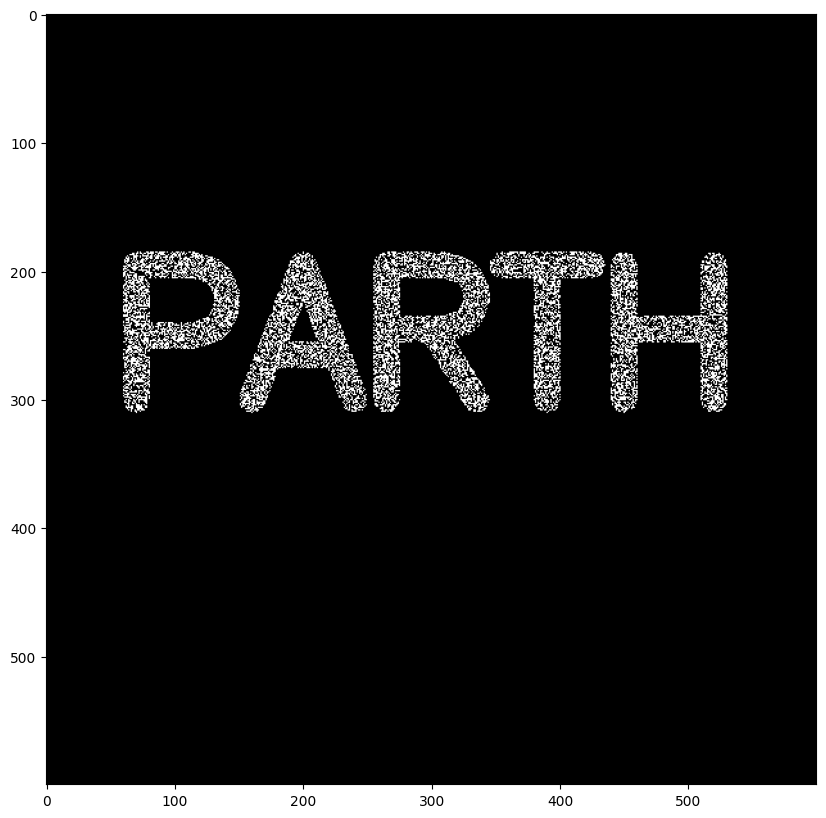

In [79]:
display_img(black_noise_img)

## **Closing**

In [80]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

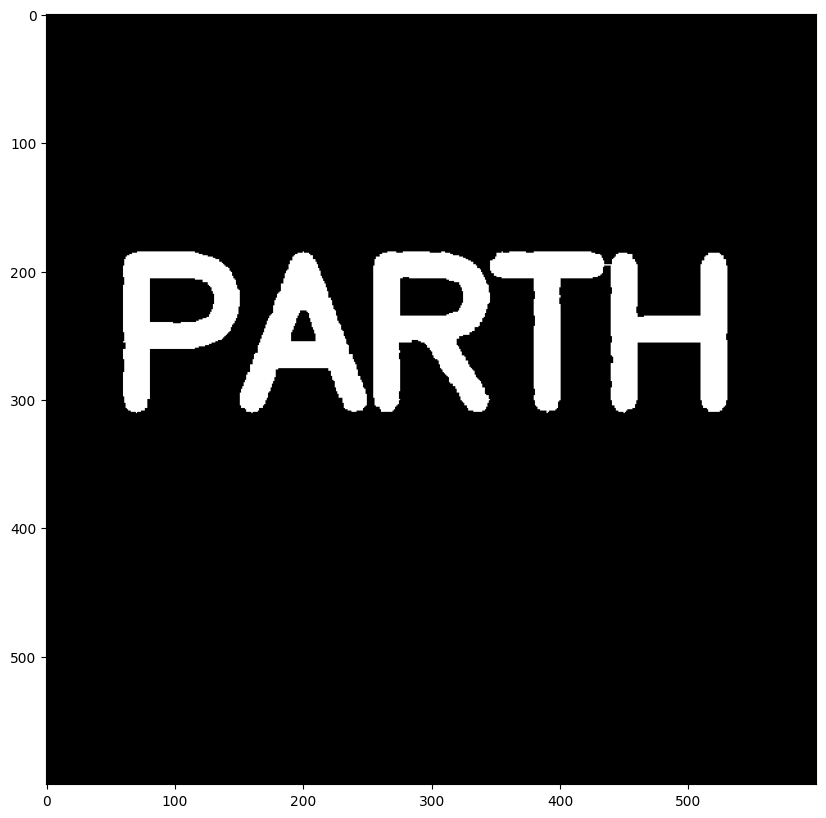

In [81]:
display_img(closing)

In [82]:
img = load_img()

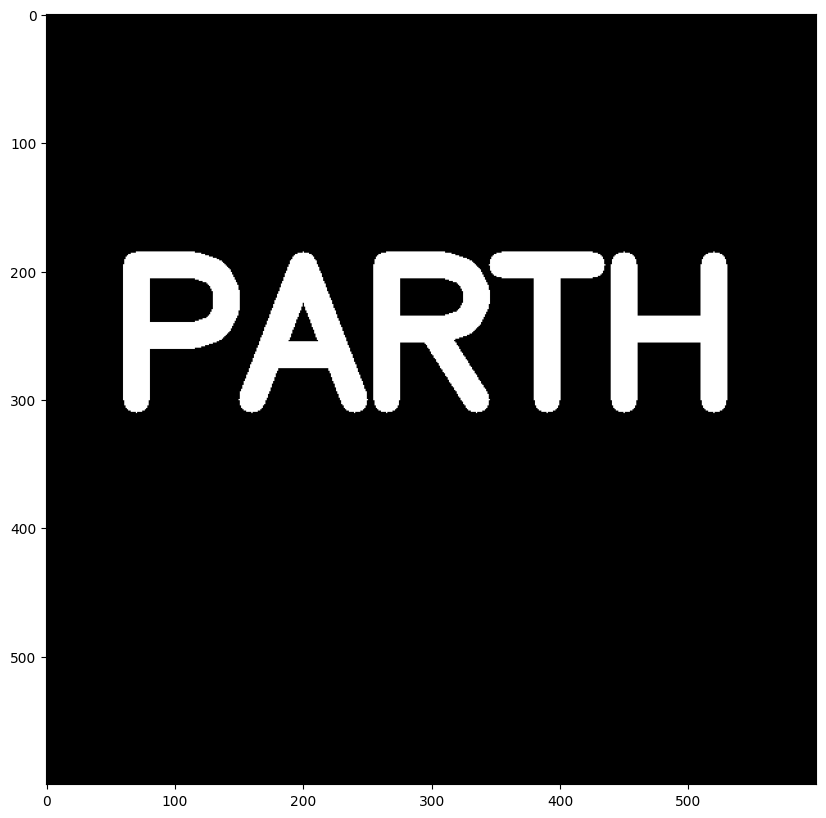

In [83]:
display_img(img)

In [84]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

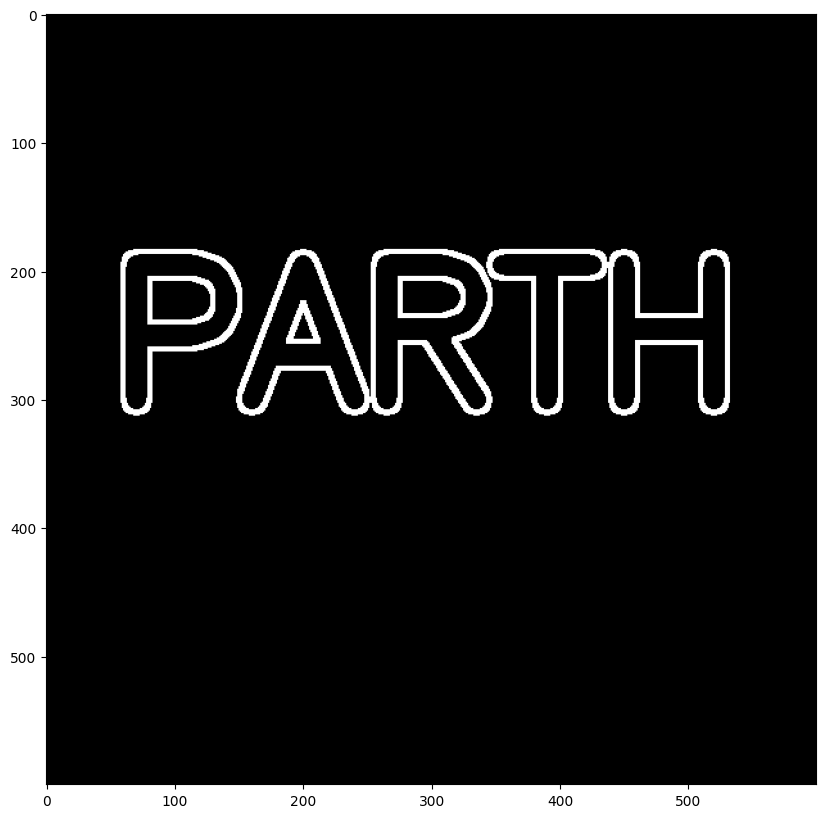

In [85]:
display_img(gradient)